In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

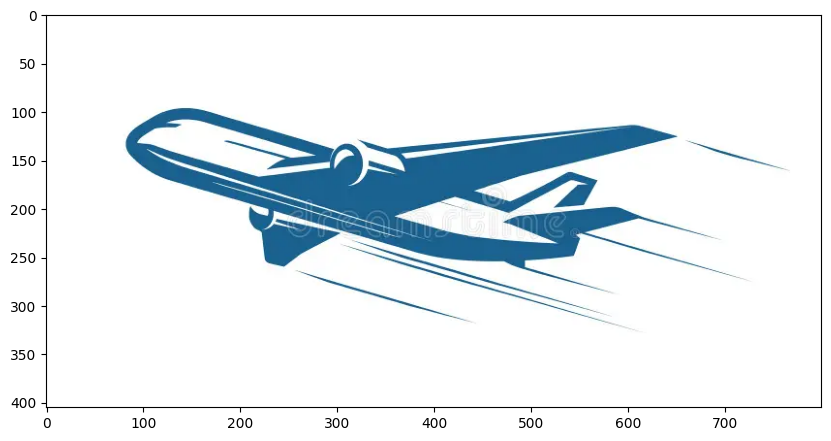

In [59]:
image=mpimg.imread('/content/airline_image')
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()

In [2]:
df=pd.read_csv('/content/airlines_flights_data.csv')

# **Datasetin yoxlanması və əsas statistikası**

In [3]:
df.head()


,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [32]:
df.isna().sum()

,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0


In [30]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price', 'days_left_group'],
      dtype='object')

In [6]:
#index sütunu silinir
df.drop('index',axis=1,inplace=True)

In [7]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [37]:
# Datasetdə hansı aviaşirkətlər var və onların tezlikləri nə qədərdir?
groupby_airlines=df['airline'].value_counts()
groupby_airlines

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


<Axes: ylabel='airline'>

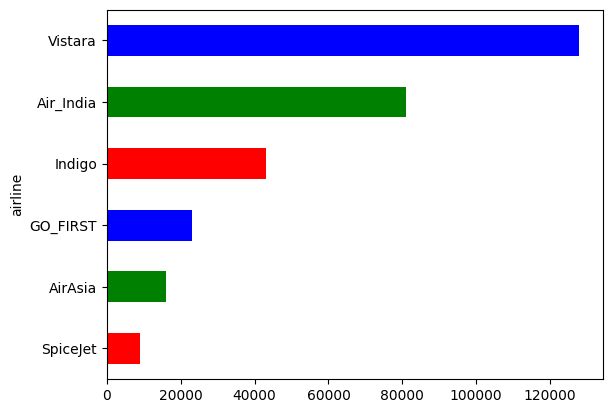

In [45]:
df['airline'].value_counts(ascending=True).plot.barh(color=['r','g','b'])

# Vizuallaşdırma və Əlaqələrin **Analizi**

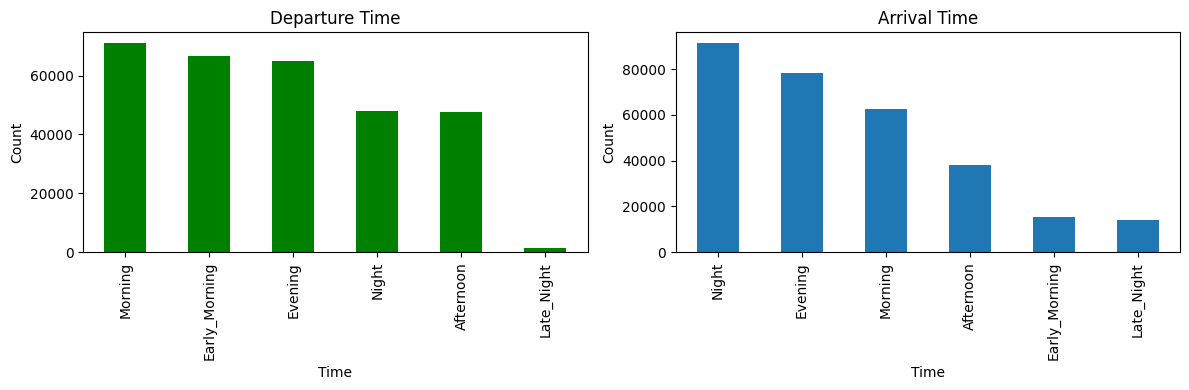

In [50]:
# Gediş vaxtı və Gəliş vaxtını təmsil edən Bar Qrafikləri göstərin.
fig, axes = plt.subplots(1, 2, figsize=(12,4))

df['departure_time'].value_counts().plot(kind='bar', ax=axes[0],color='green')
axes[0].set_title("Departure Time")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Count")

df['arrival_time'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title("Arrival Time")
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Destination City')

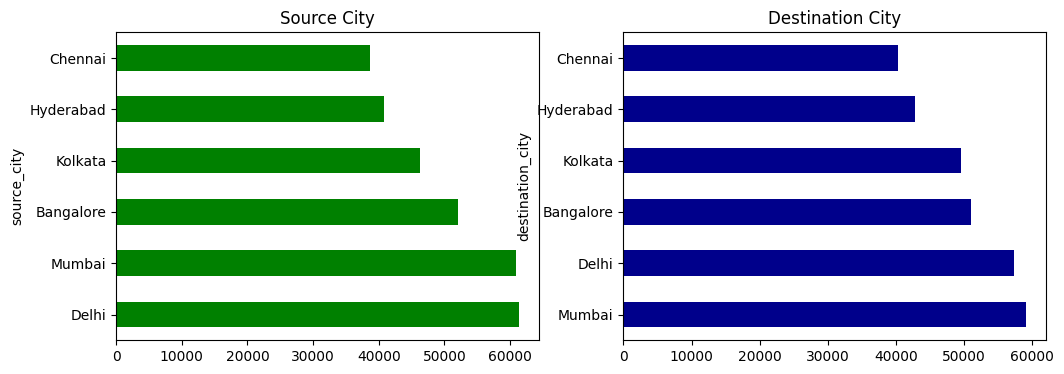

In [54]:
# Mənbə Şəhəri və Təyinat Şəhəri təmsil edən Bar Qrafikləri göstərin.
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
df['source_city'].value_counts().plot(kind='barh',color=['green'])
plt.title('Source City')

plt.subplot(1,2,2)
df['destination_city'].value_counts().plot(kind='barh',color=['darkblue'])
plt.title('Destination City')

# **Qiymət və Sinif Analizi**

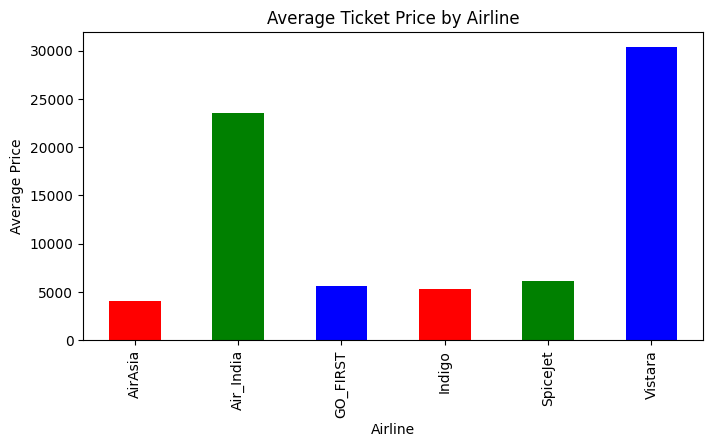

In [44]:
# Qiymət aviaşirkətlərə görə dəyişirmi?
# Ortalama bilet qiymətlərini müqayisə etdikdə Air_İndia və Vistara hava yollarında qiymətlərin yüksək olduğunu görürük lakin siniflər üzrə müqayisəyə
# baxsaq daha dəqiq nəticə əldə edərik.
df.groupby("airline")["price"].mean().plot(kind="bar",figsize=(8,4),color=['r','g','b'])

plt.title("Average Ticket Price by Airline")
plt.xlabel("Airline")
plt.ylabel("Average Price")
plt.show()

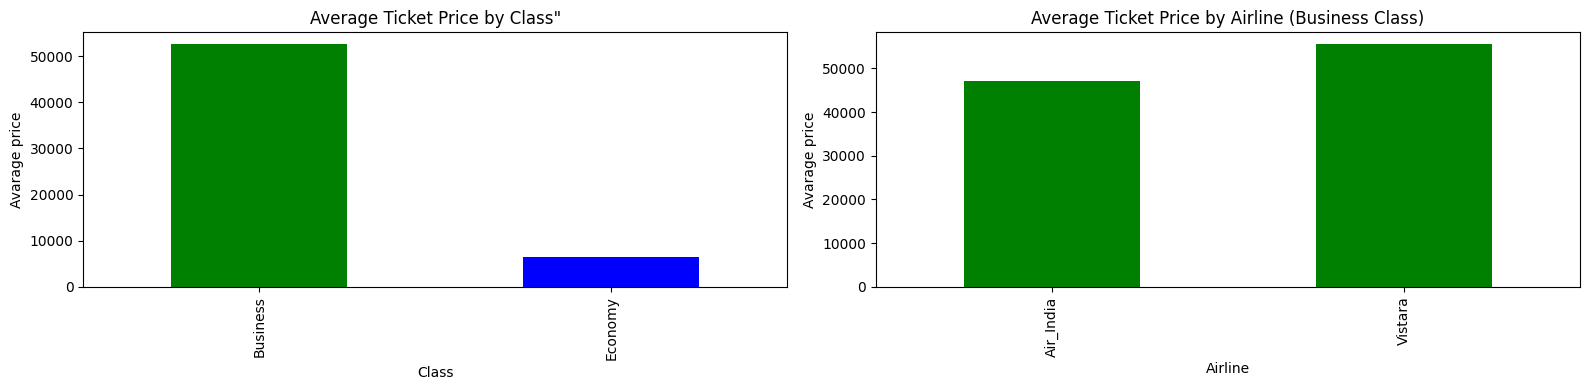

In [63]:
# Biznes class da qiymətlər arasinda böyük bir fərq olmadığını görürük
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
df.groupby('class')['price'].mean().plot(kind='bar',color=['g','b'],ax=axes[0])
axes[0].set_title('Average Ticket Price by Class"')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Avarage price')

business_df = df[df["class"] == "Business"]
business_df.groupby("airline")["price"].mean().plot(kind="bar",color="green",ax=axes[1])
axes[1].set_title('Average Ticket Price by Airline (Business Class)')
axes[1].set_xlabel('Airline')
axes[1].set_ylabel('Avarage price')
plt.tight_layout()
plt.show()

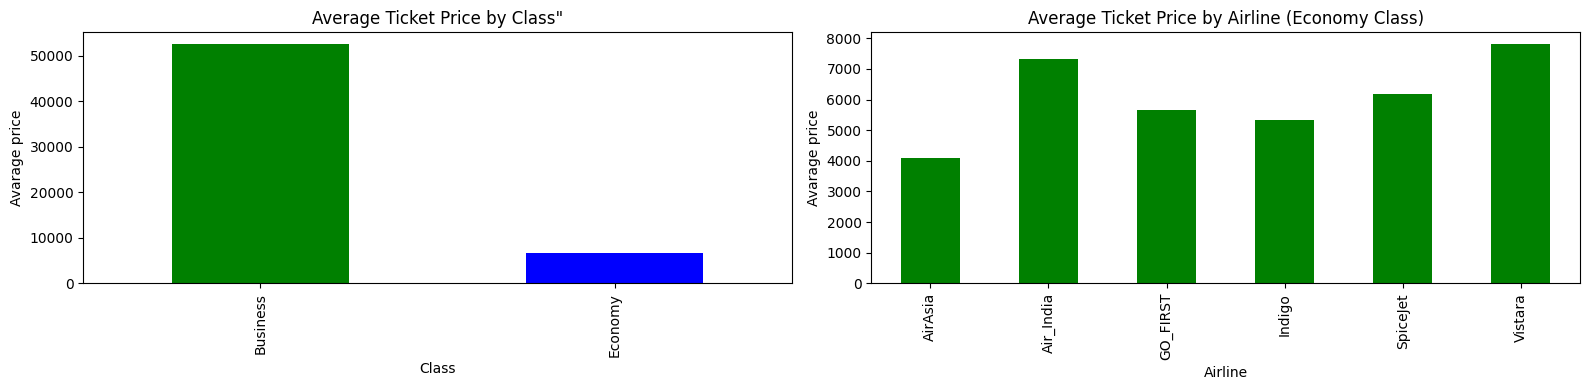

In [61]:
# Economy sinfində isə qiymət fərqinin bəzi hava yollarında ortalamadan təxminən 2 dəfə yüksək olduğunu görürük
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
df.groupby('class')['price'].mean().plot(kind='bar',color=['g','b'],ax=axes[0])
axes[0].set_title('Average Ticket Price by Class"')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Avarage price')

business_df = df[df["class"] == "Economy"]
business_df.groupby("airline")["price"].mean().plot(kind="bar",color="green",ax=axes[1])
axes[1].set_title('Average Ticket Price by Airline (Economy Class)')
axes[1].set_xlabel('Airline')
axes[1].set_ylabel('Avarage price')
plt.tight_layout()
plt.show()

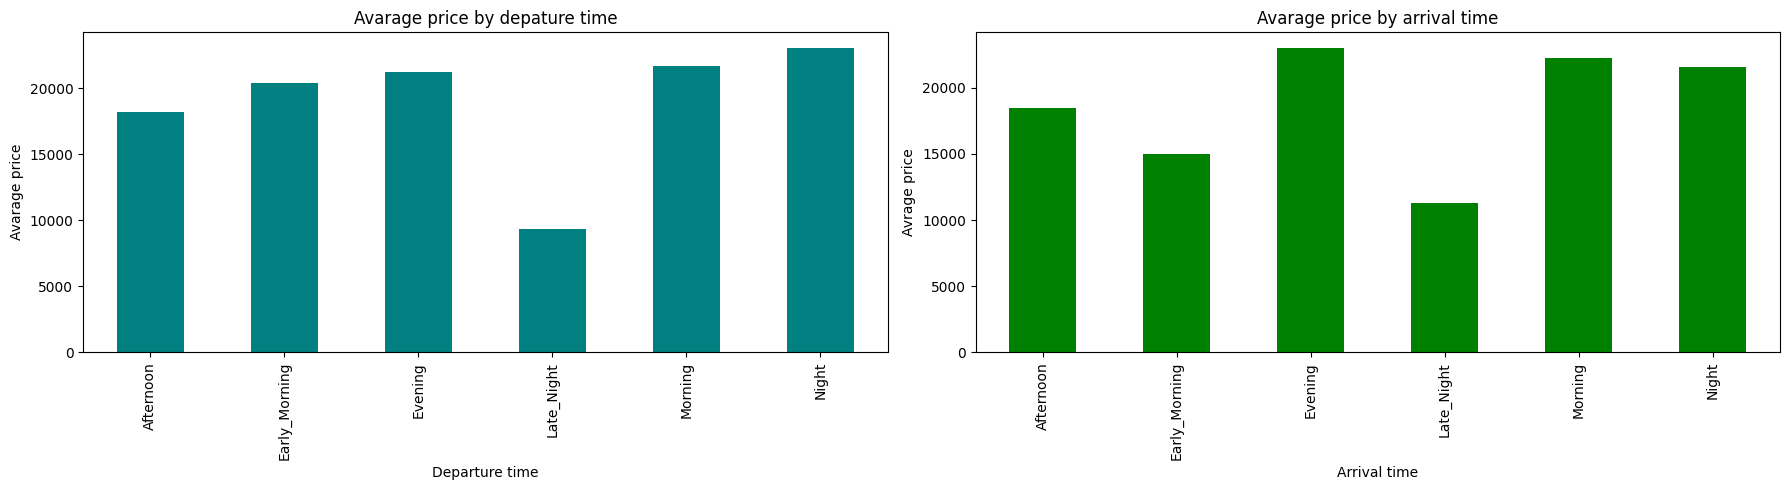

In [14]:
# Bilet qiyməti gediş vaxtı və gəliş vaxtına əsasən dəyişirmi?
# Bəli dəyişir. Həm Departure time hem de arrival time da late_night biletlərin qiyməti daha aşağıdır
departure_price_analysis = df.groupby('departure_time')['price'].mean()
arrival_price_analysis = df.groupby('arrival_time')['price'].mean()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))
departure_price_analysis.plot(kind='bar',color='teal',ax=axes[0])
axes[0].set_title('Avarage price by depature time')
axes[0].set_xlabel('Departure time')
axes[0].set_ylabel('Avarage price')

arrival_price_analysis.plot(kind='bar',color='green',ax=axes[1])
axes[1].set_title('Avarage price by arrival time')
axes[1].set_xlabel('Arrival time')
axes[1].set_ylabel('Avrage price')
plt.tight_layout()
plt.show()

In [15]:
# Qiymət mənbə və təyinatın dəyişməsi ilə necə dəyişir?

# 'source_city' və 'destinatin_city' sütunlarına görə qruplaşdırma və orta qiyməti hesablama
route_price_analysis = df.groupby(['source_city', 'destination_city'])['price'].mean().sort_values(ascending=False)


# Ən bahalı 5 marşrutu göstərək
print("Ən Bahalı 5 Marşrut")
print(route_price_analysis.head(5).to_string(float_format="%.2f"))

print("\n Ən Ucuz 5 Marşrut:")
# Ən ucuz 5 marşrutu göstərək
print(route_price_analysis.tail(5).to_string(float_format="%.2f"))


Ən Bahalı 5 Marşrut
source_city  destination_city
Chennai      Bangalore          25081.85
Kolkata      Chennai            23660.36
Bangalore    Kolkata            23500.06
             Chennai            23321.85
Mumbai       Bangalore          23147.87

 Ən Ucuz 5 Marşrut:
source_city  destination_city
Mumbai       Delhi              18725.32
Delhi        Bangalore          17880.22
Bangalore    Delhi              17723.31
Delhi        Hyderabad          17347.29
Hyderabad    Delhi              17243.95


In [16]:
# Days_left vs Price (müddət-qiymət əlaqəsi)
df.corr(numeric_only=True)

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


In [17]:
# Biletlər uçuşdan cəmi 1 və ya 2 gün əvvəl alındıqda qiymət necə təsirlənir?
# Qiymət yüksək olur
overall_avg_price = df['price'].mean()
last_minute_tickets = df[df['days_left'].isin([1, 2])]
last_minute_avg_price = last_minute_tickets['price'].mean()

print(f"Bütün biletlərin orta qiyməti: {overall_avg_price:.2f}")
print(f"Uçuşa 1-2 gün qalmış alınan biletlərin orta qiyməti: {last_minute_avg_price:.2f}")


Bütün biletlərin orta qiyməti: 20889.66
Uçuşa 1-2 gün qalmış alınan biletlərin orta qiyməti: 27421.17


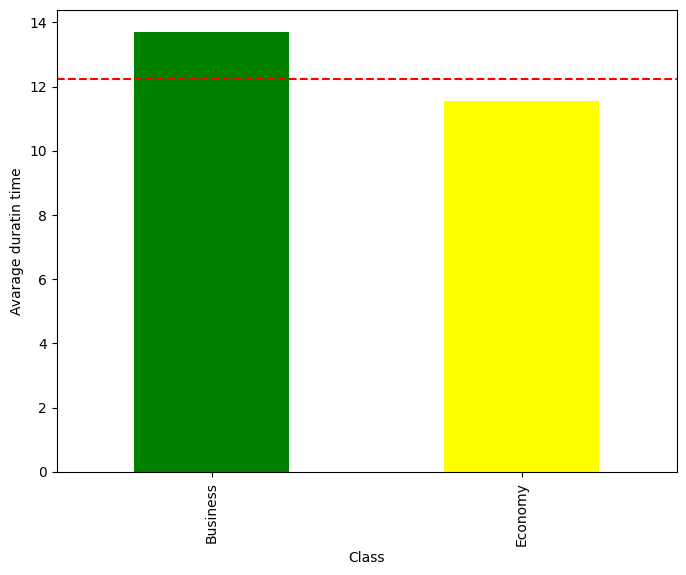

In [18]:
# Datasetdəki uçuşların orta müddəti (duration) nə qədərdir və bu müddət sinflərə (Economy/Business) görə necə fərqlənir?
# Economy sinfində ortalama zaman daha aşağıdır
avarage_duration_time=df['duration'].mean()
avarage_duration_time_by_class=df.groupby('class')['duration'].mean()

plt.figure(figsize=(8,6))
avarage_duration_time_by_class.plot(kind='bar',color=['green','yellow'])
plt.axhline(y=avarage_duration_time,color='red',linestyle='--')
plt.xlabel('Class')
plt.ylabel('Avarage duratin time')
plt.show()


In [19]:
# Aviaşirkətlər üzrə uçuş müddəti
df.groupby('airline')['duration'].mean().sort_values()

,duration
airline,
Indigo,5.795197
GO_FIRST,8.755380
AirAsia,8.941714
SpiceJet,12.579767
Vistara,13.326634
Air_India,15.504235


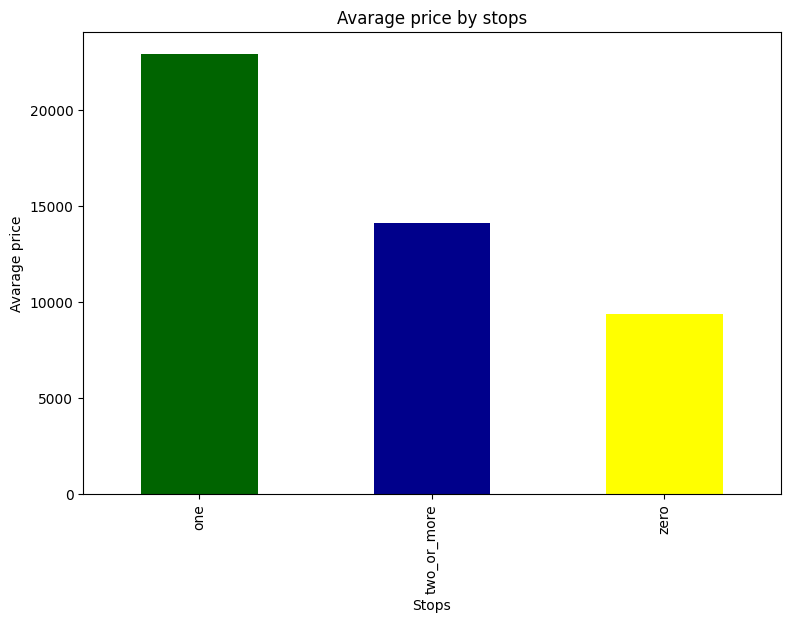

In [20]:
# Durak sayı (stops) qiymətə necə təsir edir? (Məsələn, zero, one, two_or_more duraklar üçün orta qiymətləri müqayisə edin.)
# Stop sayı artıqca bilet qiyməti də yüksəlir
stops=df.groupby('stops')['price'].mean()

plt.figure(figsize=(9, 6))
stops.plot(kind='bar', color=['darkgreen','darkblue','yellow'])

plt.title('Avarage price by stops')
plt.xlabel('Stops')
plt.ylabel('Avarage price')
plt.show()

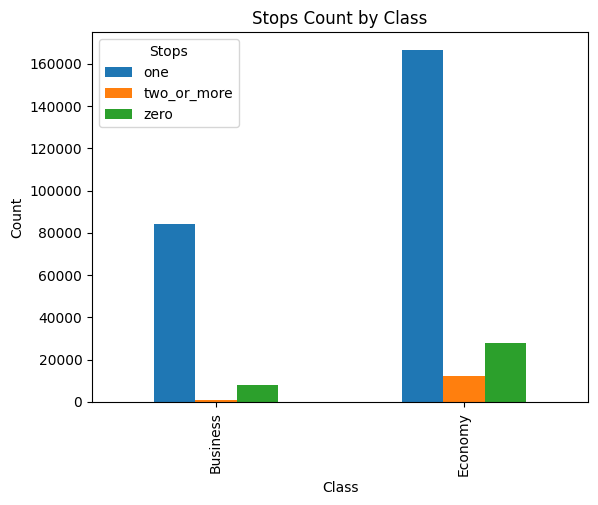

In [21]:
# Siniflər üzrə Stop sayı
stop_count_by_class=df.groupby(['class','stops'])['price'].count().unstack()
stop_count_by_class.plot(kind='bar')
plt.title('Stops Count by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Stops')
plt.show()

/tmp/ipython-input-1377790681.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_days_left = df.groupby('days_left_group')['price'].mean()


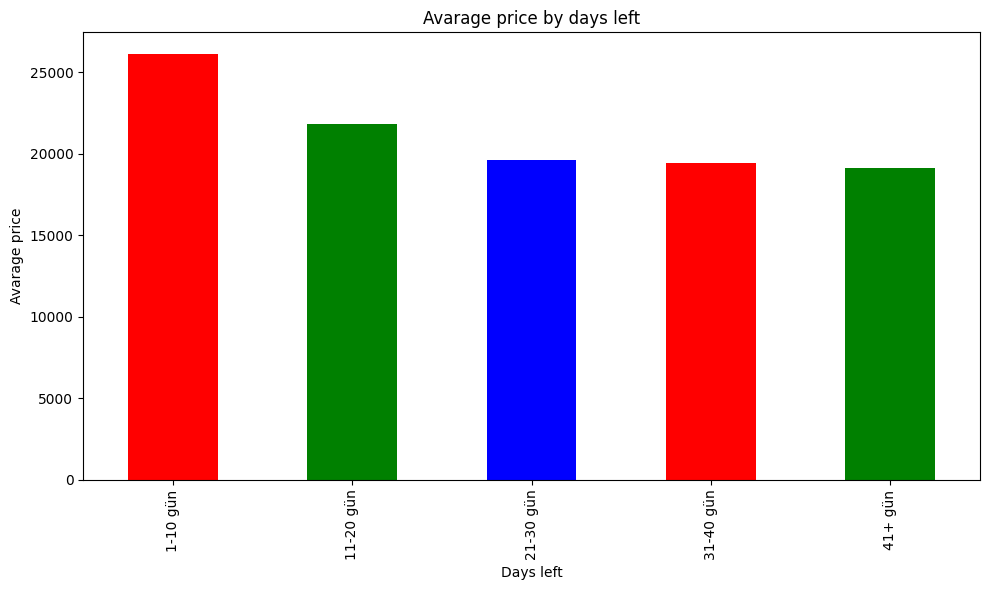

In [65]:
"""Günlər qalmış (days_left) dəyişkəninə görə qiymətin paylanması necədir?
(Məsələn, 1-10 gün, 11-20 gün və s. qruplar üzrə qrafik və ya orta qiymətlər.)"""

bins = [1, 10, 20, 30, 40, df['days_left'].max() + 1]
labels = ['1-10 gün', '11-20 gün', '21-30 gün', '31-40 gün', '41+ gün']
df['days_left_group'] = pd.cut(df['days_left'], bins=bins, labels=labels, right=False,include_lowest=True)
avg_price_by_days_left = df.groupby('days_left_group')['price'].mean()


plt.figure(figsize=(10, 6))
avg_price_by_days_left.plot(kind='bar', color=['r','g','b'])

plt.title('Avarage price by days left')
plt.xlabel('Days left')
plt.ylabel('Avarage price')
plt.tight_layout()
plt.show()

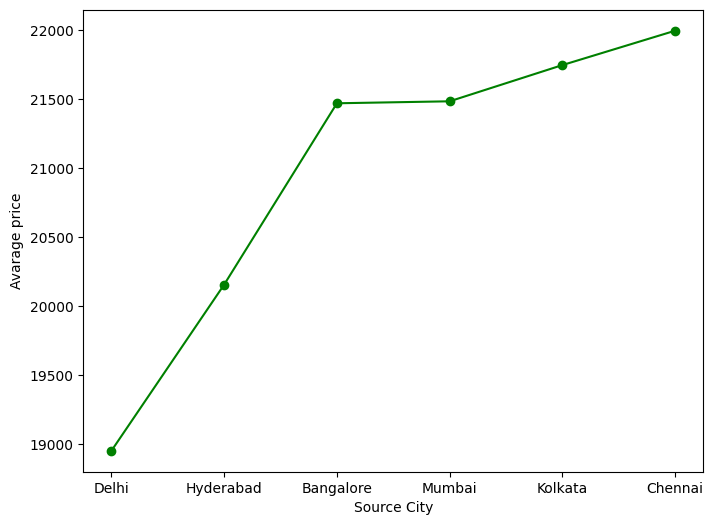

In [23]:
# Hansı mənbə şəhərdən (source_city) ən çox uçuş var və onların orta qiyməti nə qədərdir?
flight_counts = df['source_city'].value_counts()
most_flights_city = flight_counts.index[0]
max_flights_count = flight_counts.iloc[0]
avg_price_by_city = df.groupby('source_city')['price'].mean().sort_values(ascending=True)

plt.figure(figsize=(8,6))
avg_price_by_city.plot(kind='line',color='green',marker='o')
plt.xlabel('Source City')
plt.ylabel('Avarage price')
plt.show()


In [24]:
# Biznes sinfində uçuşların ümumi sayı və orta qiyməti İqtisadiyyat sinfi ilə müqayisədə necədir?
class_comparison = df.groupby('class').agg(
    Uçuş_Sayı=('class', 'size'),
    Orta_Qiymət=('price', 'mean')).sort_values(by='Orta_Qiymət', ascending=False)
class_comparison

,Uçuş_Sayı,Orta_Qiymət
class,,
Business,93487,52540.081124
Economy,206666,6572.342383


In [25]:
# Datasetdəki ən bahalı və ən ucuz uçuşlar hansı aviaşirkətlərə və şəhərlərə aiddir? (Ən azı 5 nümunə verin.)

cols_to_display = ['airline', 'source_city', 'price', 'class', 'flight']

# Ən Bahalı 5 Uçuş
most_expensive_flights = df.sort_values(
    by='price',
    ascending=False
).head(5)[cols_to_display]

# Ən Ucuz 5 Uçuş
least_expensive_flights = df.sort_values(
    by='price',
    ascending=True
).head(5)[cols_to_display]

print(" Ən Bahalı 5 Uçuş ")
print(most_expensive_flights.to_string(index=False,float_format='%.2f'))

print("\nƏn Ucuz 5 Uçuş ")
print(least_expensive_flights.to_string(index=False, float_format="%.2f"))

 Ən Bahalı 5 Uçuş 
airline source_city  price    class flight
Vistara     Kolkata 123071 Business UK-772
Vistara       Delhi 117307 Business UK-811
Vistara       Delhi 116562 Business UK-809
Vistara   Hyderabad 115211 Business UK-870
Vistara     Kolkata 114705 Business UK-772

Ən Ucuz 5 Uçuş 
 airline source_city  price   class flight
GO_FIRST     Chennai   1105 Economy G8-505
  Indigo     Chennai   1105 Economy 6E-588
  Indigo     Chennai   1105 Economy 6E-804
  Indigo     Chennai   1105 Economy 6E-847
  Indigo     Chennai   1105 Economy 6E-495


In [26]:
# Economy sinfində ən bahalı 10 uçuş qiyməti və istiqaməti
df[df['class']=='Economy'].groupby(['source_city','destination_city'])['price'].mean().nlargest(10)


source_city  destination_city
Kolkata      Chennai             8011.745229
Chennai      Kolkata             7547.295815
Kolkata      Hyderabad           7489.144374
             Bangalore           7471.621990
             Mumbai              7405.787239
Bangalore    Kolkata             7375.638594
Mumbai       Kolkata             7227.971735
Chennai      Bangalore           7175.020192
Kolkata      Delhi               7161.400077
Bangalore    Chennai             7105.953850
Name: price, dtype: float64

In [27]:
# Business sinfində ən bahalı 10 uçuş qiyməti və istiqaməti
df[df['class']=='Business'].groupby(['source_city','destination_city'])['price'].mean().nlargest(10)

,,price
source_city,destination_city,
Bangalore,Kolkata,58854.693091
Kolkata,Bangalore,58681.104437
Bangalore,Mumbai,58024.618208
Mumbai,Bangalore,57970.544389
Kolkata,Mumbai,57422.551724
Mumbai,Kolkata,57106.526385
Chennai,Kolkata,57078.895872
Kolkata,Chennai,56502.775035
Delhi,Kolkata,56239.853659
